# Generator

In [1]:
%matplotlib inline
import numpy as np
import os
from timeit import default_timer as timer
import image_tools as imt
from augmentator import Augmentator
from generator import Generator

In [2]:
image_shape = [128,128,1]
images_dir  = "/netforge/datasets/private/roman/coins/2017-11-29/images/train/"
dataset_dir = "/netforge/datasets/private/roman/coins/2017-11-29/datasets/train/"

## Generate

In [3]:
%%time 
gen = Generator()
try:
    start = timer()
    gen.generate(
        images_path = images_dir, 
        image_shape = image_shape, 
        augmentator = Augmentator('aug2'), 
        image_num   = 5557,
        aug_num     = 300,
    )
    t = timer() - start
    augmented = gen.augmented
    n = augmented.shape[0]*augmented.shape[1]
    print("Augmented  : %d images" % n)
    print("Performance: %.1f img/sec" % (n/t))
    print("Augmented  :", augmented.dtype, augmented.shape, augmented.nbytes/1024/1024, "MB")
except KeyboardInterrupt:
    print("Interrupted")
print("-"*50)

100%|██████████| 300/300 [5:00:35<00:00, 60.12s/it]  


Augmented  : 1667100 images
Performance: 92.4 img/sec
Augmented  : uint8 (5557, 300, 128, 128, 1) 26048.4375 MB
--------------------------------------------------
CPU times: user 3h 36min 45s, sys: 3h 3min 45s, total: 6h 40min 31s
Wall time: 5h 42s


## Save

In [4]:
%%time
dataset_path = gen.save(dataset_dir)
print("Dataset:", dataset_path)

Dataset: /netforge/datasets/private/roman/coins/2017-11-29/datasets/train/5557_300_128_128_1_uint8_aug2.npy
CPU times: user 7.44 s, sys: 16.6 s, total: 24.1 s
Wall time: 2min 7s


## Load

In [26]:
%%time
try:
    del gen.data
    del gen
except:
    pass
data = np.load(dataset_path)
print("Data:", data.dtype, data.shape, data.nbytes/1024/1024, "MB")
print("-"*50)

Data: uint8 (1000, 300, 128, 128, 1) 4687.5 MB
--------------------------------------------------
CPU times: user 4 ms, sys: 17.3 s, total: 17.3 s
Wall time: 17.3 s


## Show

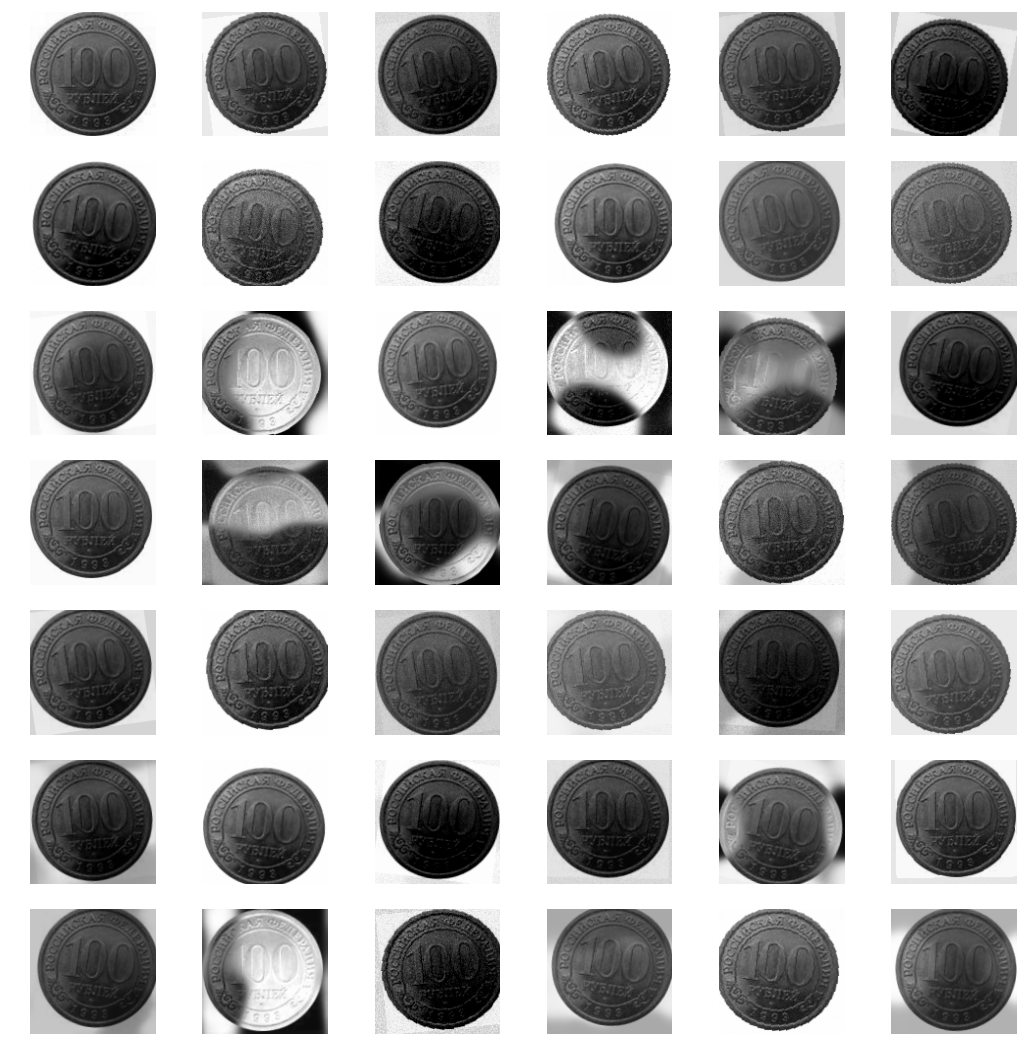

In [27]:
images = data[7,:42]
images = imt.uint8_to_float32(images)
imt.plot(images, 6)